<a href="https://colab.research.google.com/github/alfathroziqq/PCD_Assignment_2_Kelompok/blob/main/Tugas_2_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRARY**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
from PIL import Image, ImageOps
from google.colab import files
from io import BytesIO

## **1. RGB**

Saving haha.png to haha.png


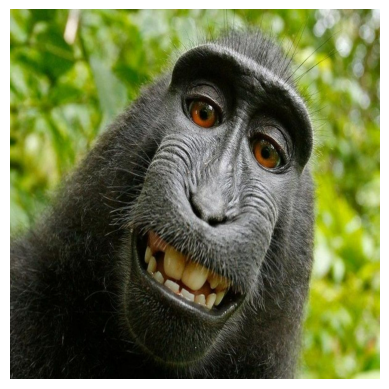

In [ ]:
def rgb_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image_rgb = Image.open(io.BytesIO(uploaded[filename]))
        image_rgb = image_rgb.convert('RGB')

        # Show gambar
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

rgb_image()

## **2. RGB to Grayscale**

Saving monyet.png to monyet.png


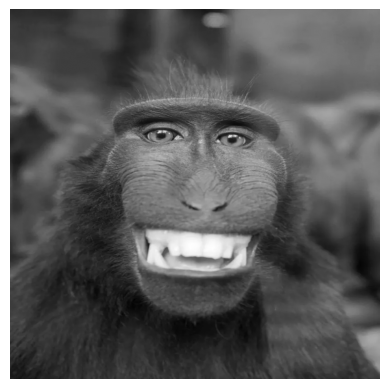

In [ ]:
def rgb_to_grayscale():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image_to_grayscale = Image.open(io.BytesIO(uploaded[filename]))
        image_to_grayscale = image_to_grayscale.convert('L')

        # Show gambar
        plt.imshow(image_to_grayscale, cmap="gray")
        plt.axis('off')
        plt.show()

rgb_to_grayscale()

## **3. Grayscale to Biner**

Saving monyet.png to monyet (1).png


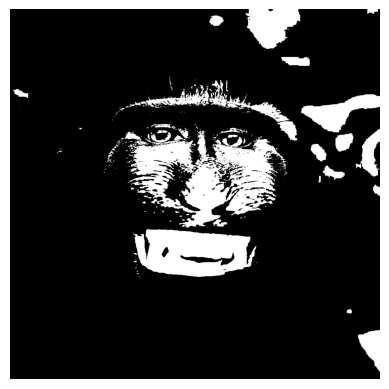

In [ ]:
def grayscale_to_biner():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(io.BytesIO(uploaded[filename]))
        image = image.convert('L')

        # Konversi ke biner
        threshold = 128
        binary_image = image.point(lambda p: 255 if p > threshold else 0, '1')

        plt.imshow(binary_image, cmap='gray')
        plt.axis('off')
        plt.show()

grayscale_to_biner()

## **4. RGB to CMY**

Saving haha.png to haha (8).png


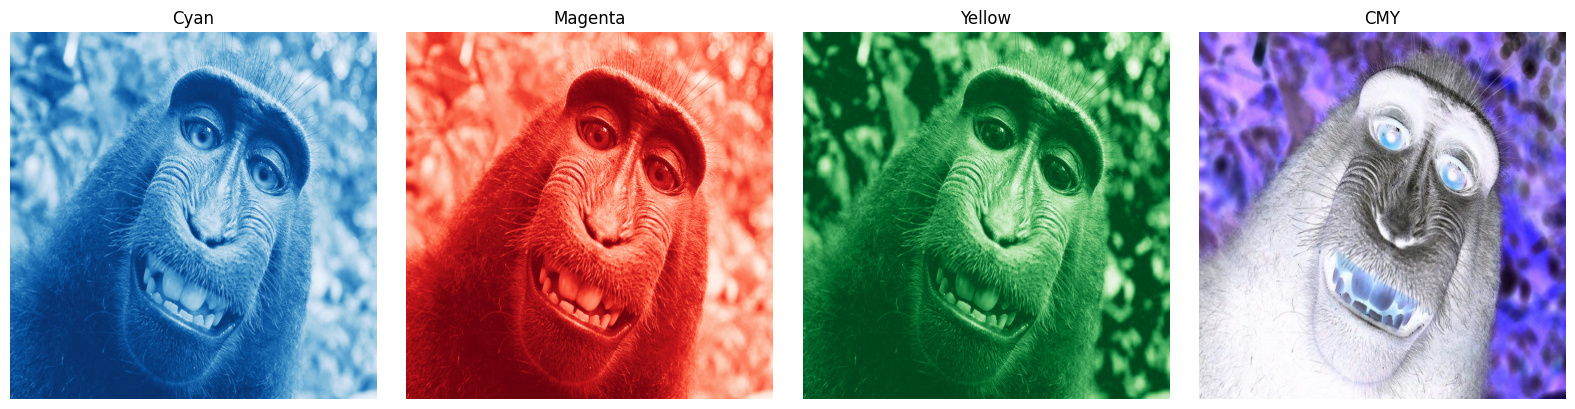

In [ ]:
def rgb_to_cmy():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(io.BytesIO(uploaded[filename]))
        image = image.convert('RGB')

        img_rgb = np.array(image) / 255.0

        # Konversi ke CMY
        C = 1.0 - img_rgb[:, :, 0]
        M = 1.0 - img_rgb[:, :, 1]
        Y = 1.0 - img_rgb[:, :, 2]

        cmy_images = [C, M, Y]
        cmy_titles = ['Cyan', 'Magenta', 'Yellow']
        cmy_cmaps = ['Blues', 'Reds', 'Greens']

        combined_cmy = np.stack([C, M, Y], axis=-1)

        fig, axes = plt.subplots(1, 4, figsize=(16, 4))

        for i in range(3):
            axes[i].imshow(cmy_images[i], cmap=cmy_cmaps[i])
            axes[i].set_title(cmy_titles[i])
            axes[i].axis('off')

        axes[3].imshow(combined_cmy)
        axes[3].set_title('CMY')
        axes[3].axis('off')

        plt.tight_layout()
        plt.show()

rgb_to_cmy()


## **5. RGB to HSI**

Saving haha.png to haha (9).png


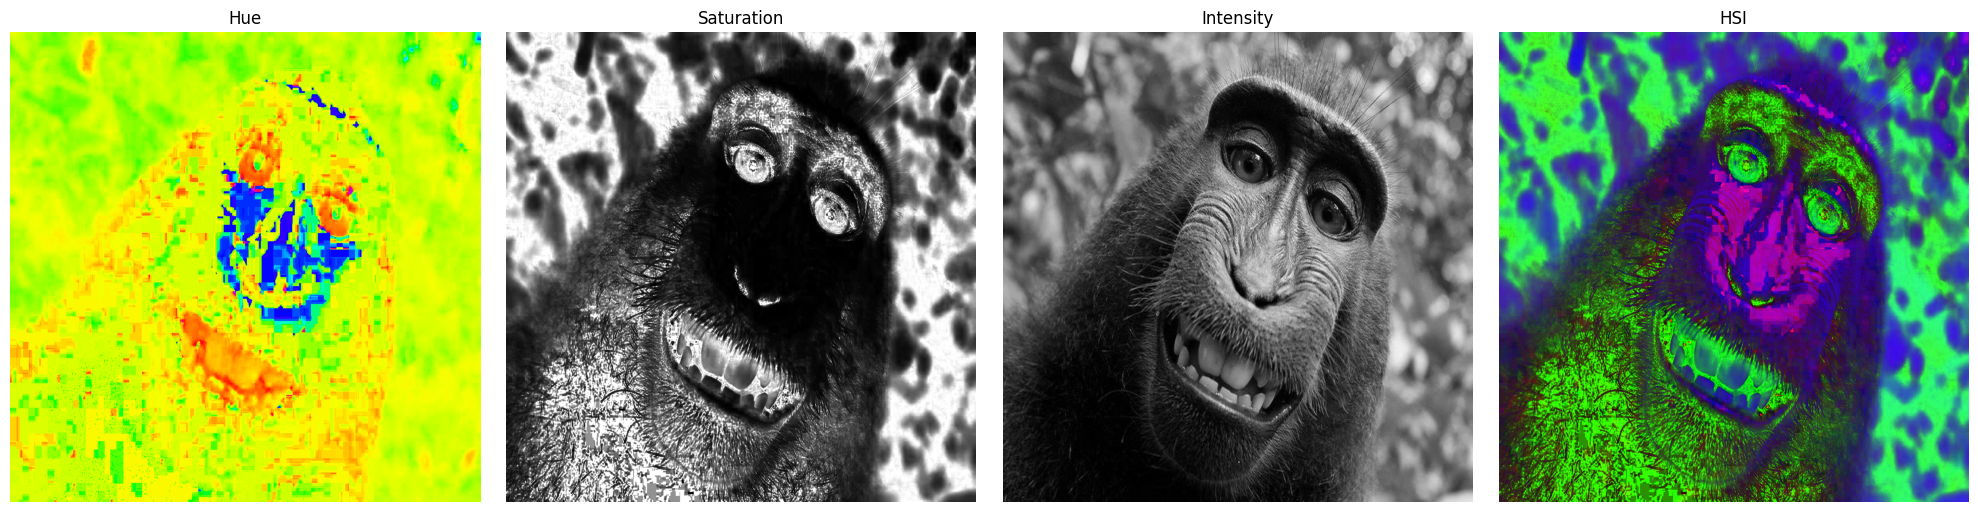

In [ ]:
def rgb_to_hsi():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image_rgb = Image.open(io.BytesIO(uploaded[filename]))
        image_rgb = image_rgb.convert('RGB')

        img_rgb = np.array(image_rgb) / 255.0
        R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

        # Konversi ke HSI
        I = np.mean(img_rgb, axis=2)
        min_rgb = np.min(img_rgb, axis=2)
        S = 1 - (min_rgb / (I + 1e-10))

        num = 0.5 * ((R - G) + (R - B))
        den = np.sqrt((R - G) ** 2 + (R - B) * (G - B)) + 1e-10
        theta = np.arccos(num / den)

        H = np.where(B > G, 2 * np.pi - theta, theta)
        H = H / (2 * np.pi)  # Normalisasi ke [0,1]

        HSI_combined = np.stack([H, S, I], axis=2)

        fig, axes = plt.subplots(1, 4, figsize=(20, 5))

        axes[0].imshow(H, cmap='hsv')
        axes[0].set_title('Hue')
        axes[0].axis('off')

        axes[1].imshow(S, cmap='gray')
        axes[1].set_title('Saturation')
        axes[1].axis('off')

        axes[2].imshow(I, cmap='gray')
        axes[2].set_title('Intensity')
        axes[2].axis('off')

        axes[3].imshow(HSI_combined)
        axes[3].set_title('HSI')
        axes[3].axis('off')

        plt.tight_layout()
        plt.show()

rgb_to_hsi()


## **6. Transformasi Negatif**

Saving Screenshot 2025-03-20 160502.png to Screenshot 2025-03-20 160502.png


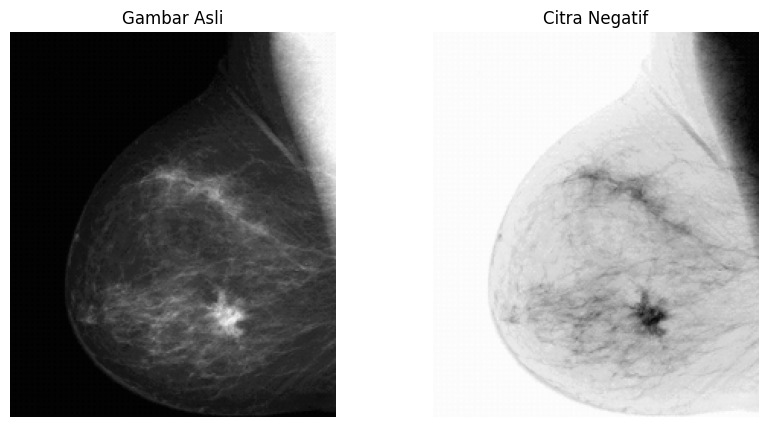

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def negative_transformation():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    gray_image = Image.open(file_name).convert('L')
    gray_array = np.array(gray_image)

    # transformasi negatif
    L = 256
    negative_array = (L - 1) - gray_array
    negative_image = Image.fromarray(negative_array)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Citra Negatif')
    plt.axis('off')

    plt.show()

negative_transformation()


## **7. Transformasi Log**

Saving Screenshot 2025-03-20 163156.png to Screenshot 2025-03-20 163156.png


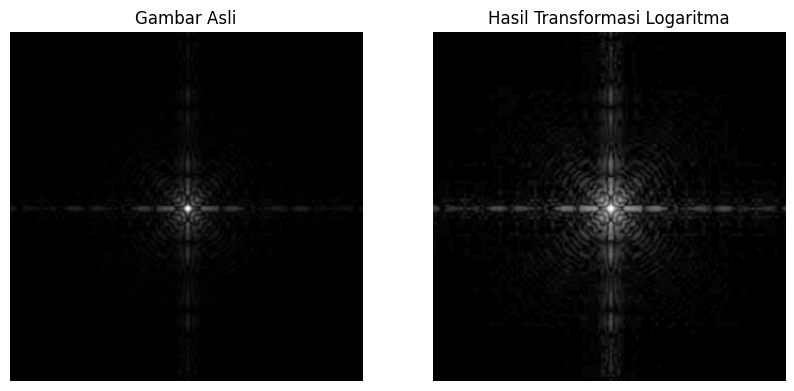

In [ ]:
def log_transform():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(BytesIO(uploaded[filename]))
        image = image.convert("L")

        image_np = np.array(image, dtype=np.float32)
        c = 255 / np.log(1 + np.max(image_np))
        log_image = c * np.log1p(image_np)
        log_image = (log_image / np.max(log_image)) * 255
        log_image = log_image.astype(np.uint8)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(image, cmap='gray')
        axes[0].set_title('Gambar Asli')
        axes[0].axis('off')

        axes[1].imshow(log_image, cmap='gray')
        axes[1].set_title('Hasil Transformasi Logaritma')
        axes[1].axis('off')

        plt.show()
        break

log_transform()


## **8. Transformasi Pangkat / Power Gamma**

Saving Screenshot 2025-03-20 164806.png to Screenshot 2025-03-20 164806 (1).png


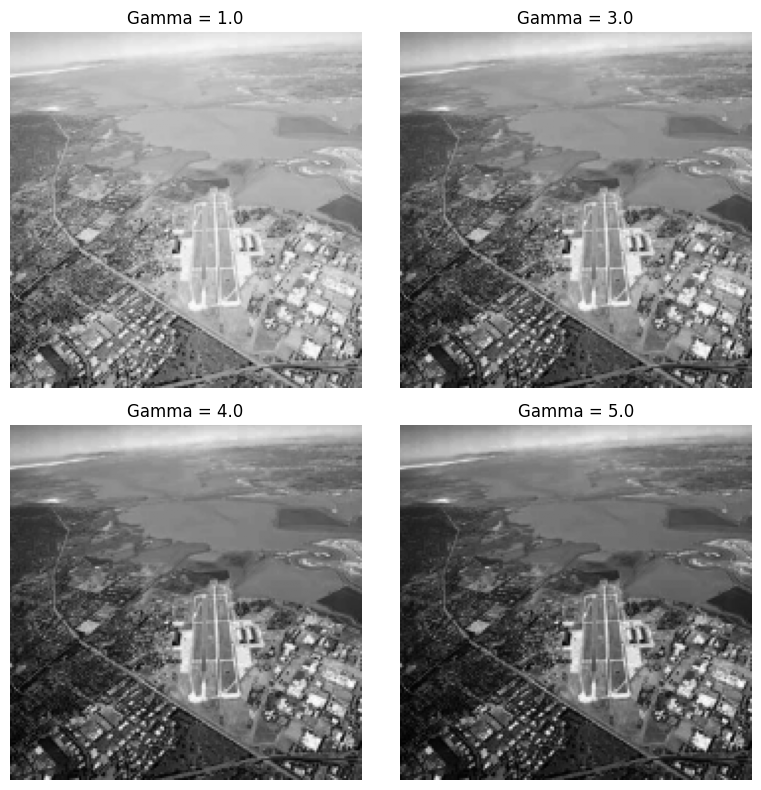

In [ ]:
def power_transform():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(BytesIO(uploaded[filename]))
        image = image.convert("L")

        image_np = np.array(image, dtype=np.float32) / 255.0
        c = 1  # Konstanta skala
        gamma_values = [1.0, 3.0, 4.0, 5.0]

        fig, axes = plt.subplots(2, 2, figsize=(8, 8))

        for ax, gamma in zip(axes.flat, gamma_values):
            power_image = c * (image_np ** gamma)
            power_image = (power_image / np.max(power_image)) * 255
            power_image = power_image.astype(np.uint8)

            ax.imshow(power_image, cmap='gray')
            ax.set_title(f'Gamma = {gamma}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()
        break

power_transform()

## **9. Histogram Tingkat Keabuan**

Saving Screenshot_2025-03-09_at_2.png to Screenshot_2025-03-09_at_2.png


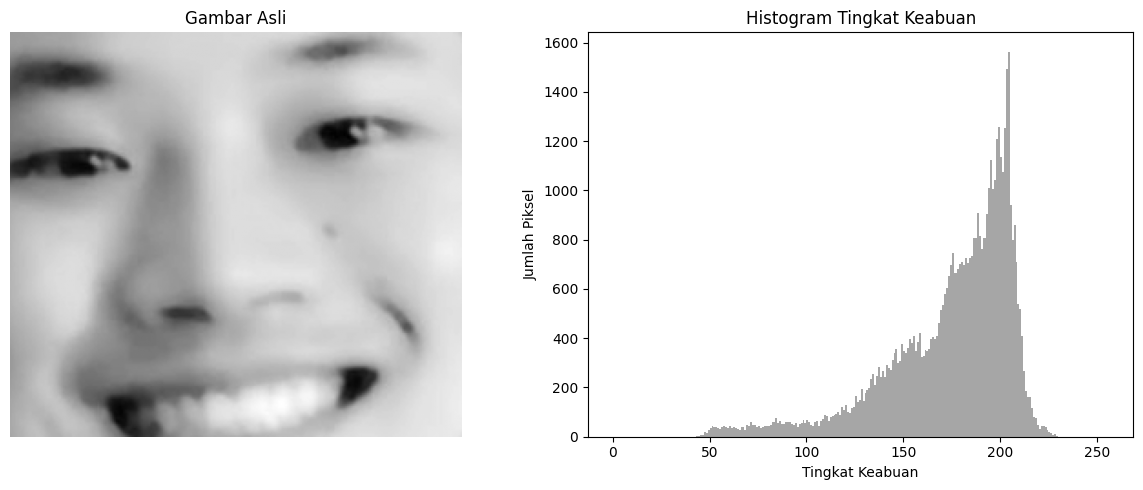

In [ ]:
def histogram_tingkat_keabuan():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Gambar Asli')
    axs[0].axis('off')

    axs[1].hist(image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    axs[1].set_title('Histogram Tingkat Keabuan')
    axs[1].set_xlabel('Tingkat Keabuan')
    axs[1].set_ylabel('Jumlah Piksel')

    plt.tight_layout()
    plt.show()

histogram_tingkat_keabuan()

## **10. Kalkulasi Histogram**

Saving Screenshot_2025-03-09_at_2.png to Screenshot_2025-03-09_at_2 (5).png


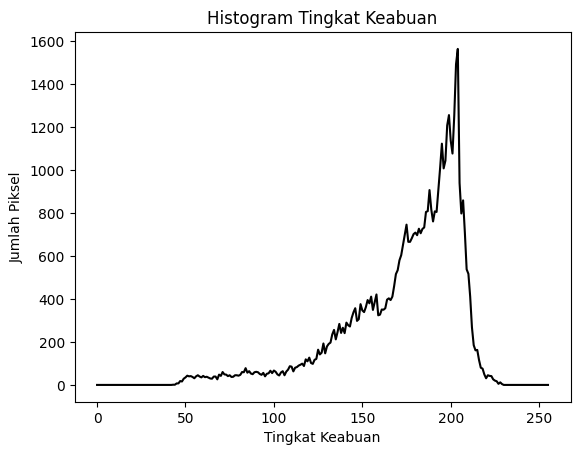

In [ ]:
# Belum fix
def kalkulasi_histogram():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(histogram, color='black')
    plt.title('Histogram Tingkat Keabuan')
    plt.xlabel('Tingkat Keabuan')
    plt.ylabel('Jumlah Piksel')
    plt.show()

kalkulasi_histogram()

## **11. Histogram Equalization (Perataan Histogram)**

Saving Screenshot_2025-03-09_at_2.png to Screenshot_2025-03-09_at_2 (6).png


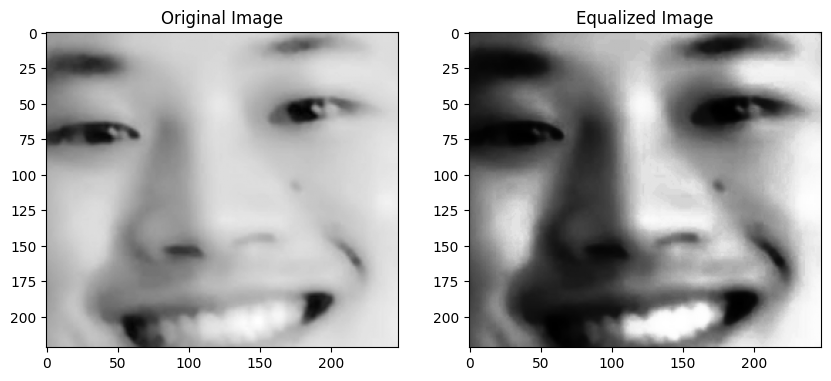

In [ ]:
def histogram_equalization():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    equalized = cv2.equalizeHist(image)
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(1,2,2)
    plt.title('Equalized Image')
    plt.imshow(equalized, cmap='gray')

    plt.show()

histogram_equalization()

## **12. Piecewise Linear Transformation Functions (Contrast strecthing dan intensity-level slicing)**

In [ ]:
def contrast_stretching(img, r1, s1, r2, s2):
    def piecewise_transform(pixel):
        if pixel < r1:
            return (s1 / r1) * pixel
        elif r1 <= pixel < r2:
            return ((s2 - s1) / (r2 - r1)) * (pixel - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (pixel - r2) + s2

    vectorized_transform = np.vectorize(piecewise_transform)
    return vectorized_transform(img).astype(np.uint8)

def intensity_level_slicing(img, min_range, max_range, high_intensity=255, background=False):
    output = np.zeros_like(img)
    mask = (img >= min_range) & (img <= max_range)
    output[mask] = high_intensity
    if background:
        output[~mask] = img[~mask]
    return output

def plot_images(original, transformed, title1, title2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    img = cv2.imread("alpat.jpeg", cv2.IMREAD_GRAYSCALE)

    contrast_img = contrast_stretching(img, 50, 0, 200, 255)
    plot_images(img, contrast_img, "Original Image", "Contrast Stretching")

    slicing_img = intensity_level_slicing(img, 100, 150, 255, background=True)
    plot_images(img, slicing_img, "Original Image", "Intensity Level Slicing")


TypeError: '<' not supported between instances of 'NoneType' and 'int'

## **13. Bit-plane slicing**

## **14. Local Histogram Processing**

## **15. Pengubahan Histogram (Spesifikasi Histogram)**

In [ ]:
print("aoa")

aoa
